### Data preprocessing

In [1]:
# Logistic Regression
# Importing the libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Classification')

In [3]:
# Import data
Main = pd.read_excel('Classification_data.xlsx',sheet_name = 0)
Wealth = pd.read_excel('Classification_data.xlsx',sheet_name = 1)
Oversea = pd.read_excel('Classification_data.xlsx',sheet_name = 2)

In [4]:
# Aggregate data
# Wealth
Wealth_flat = Wealth.groupby(['Customer_ID'])['Sales_ID'].first().to_frame()
Wealth_flat['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_flat['Area'] = Wealth.groupby(['Customer_ID'])['Area'].first()
Wealth_flat['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_flat['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_flat['AUM'] = Wealth.groupby(['Customer_ID'])['AUM'].sum()
Wealth_flat['Registration_Date'] = Wealth.groupby(['Customer_ID'])['Registration_Date'].first()
Wealth_flat = Wealth_flat.reset_index()

# Oversea
Oversea_flat = Oversea.groupby(['Customer_ID'])['Sales_ID'].first().to_frame()
Oversea_flat['Com_ID'] = Oversea.groupby(['Customer_ID'])['Com_ID'].first()
Oversea_flat['Area'] = Oversea.groupby(['Customer_ID'])['Area'].first()
Oversea_flat['Age'] = Oversea.groupby(['Customer_ID'])['Age'].first()
Oversea_flat['Gender'] = Oversea.groupby(['Customer_ID'])['Gender'].first()
Oversea_flat['AUM'] = Oversea.groupby(['Customer_ID'])['AUM'].sum()
Oversea_flat['Registration_Date'] = Oversea.groupby(['Customer_ID'])['Registration_Date'].first()
Oversea_flat = Oversea_flat.reset_index()

In [5]:
# mode replace 0
import statistics 
filter_ = np.where(Oversea_flat['Registration_Date'] == 0)[0]
Oversea_flat.loc[filter_, 'Registration_Date'] = statistics.mode(Oversea['Registration_Date'])

In [6]:
# To_date_time
Main['Registration_Date'] =  pd.to_datetime(Main['Registration_Date'], format = "%Y%m%d")
Wealth_flat['Registration_Date'] =  pd.to_datetime(Wealth_flat['Registration_Date'], format = "%Y%m%d")
Oversea_flat['Registration_Date'] =  pd.to_datetime(Oversea_flat['Registration_Date'], format = "%Y%m%d")

In [7]:
# Calculate registered days
import datetime
Now = datetime.datetime.now()
Main['Registered_Days'] = Main['Registration_Date'].map(lambda x: (Now - x)).dt.days
Wealth_flat['Registered_Days'] = Wealth_flat['Registration_Date'].map(lambda x: (Now - x)).dt.days
Oversea_flat['Registered_Days'] = Oversea_flat['Registration_Date'].map(lambda x: (Now - x)).dt.days

In [8]:
# Calculate If register time before 2008 
start_2008 = datetime.datetime.strptime('20080101', '%Y%m%d') 
Main['Befor_2008'] = Main['Registration_Date'].map(lambda x: 1 if x < start_2008 else 0)
Wealth_flat['Befor_2008'] = Wealth_flat['Registration_Date'].map(lambda x: 1 if x < start_2008 else 0)
Oversea_flat['Befor_2008'] = Oversea_flat['Registration_Date'].map(lambda x: 1 if x < start_2008 else 0)

In [9]:
# Calculate If register time in Jan or Feb (Bonus release time)
Main['Bonus_release'] = Main['Registration_Date'].map(lambda x: 1 if (x.month == 1) | (x.month == 2) else 0)
Wealth_flat['Bonus_release'] = Wealth_flat['Registration_Date'].map(lambda x: 1 if (x.month == 1) | (x.month == 2) else 0)
Oversea_flat['Bonus_release'] = Oversea_flat['Registration_Date'].map(lambda x: 1 if (x.month == 1) | (x.month == 2) else 0)

In [10]:
# set index
Main = Main.set_index('Customer_ID')
Wealth_flat = Wealth_flat.set_index('Customer_ID')
Oversea_flat = Oversea_flat.set_index('Customer_ID')

# Drop columns
Main = Main.drop(['Customer_Name', 'Sales_Name', 'Sales_ID', 'Registration_Date'], axis = 1)
Wealth_flat = Wealth_flat.drop(['Sales_ID', 'Registration_Date'], axis = 1)
Oversea_flat = Oversea_flat.drop(['Sales_ID', 'Registration_Date'], axis = 1)

In [11]:
# Dummy variables
num_vars = ['Age', 'AUM', 'Registered_Days']
cat_vars = ['Com_ID', 'Area']

def dummy(df, cat_vars):
    for var in cat_vars:
        cat_list = 'var'+'_'+ var
        cat_list = pd.get_dummies(df[var], prefix = var)
        data1 = df.join(cat_list)
        data1 = data1.drop(var, axis = 1)
        df = data1
    return df
Main = dummy(Main, cat_vars)
Wealth_flat = dummy(Wealth_flat, cat_vars)
Oversea_flat = dummy(Oversea_flat, cat_vars)

In [12]:
# Labeling 
Main['Label'] = 0
Wealth_flat['Label'] = 1
Oversea_flat['Label'] = 1

In [285]:
Main.columns

Index(['Age', 'Gender', 'AUM', 'Registered_Days', 'Befor_2008',
       'Bonus_release', 'Com_ID_5850', 'Com_ID_5851', 'Com_ID_5852',
       'Com_ID_5853', 'Com_ID_5854', 'Com_ID_5855', 'Com_ID_5856',
       'Com_ID_5857', 'Com_ID_5858', 'Com_ID_5859', 'Com_ID_585A',
       'Com_ID_585B', 'Com_ID_585D', 'Com_ID_585E', 'Com_ID_585F',
       'Com_ID_585H', 'Com_ID_585I', 'Com_ID_585J', 'Com_ID_585M',
       'Com_ID_585P', 'Com_ID_585Q', 'Com_ID_585R', 'Com_ID_585S',
       'Com_ID_585U', 'Com_ID_585W', 'Com_ID_585Y', 'Com_ID_585Z',
       'Com_ID_585b', 'Com_ID_585c', 'Com_ID_585g', 'Com_ID_585m', 'Area_C',
       'Area_N', 'Area_O', 'Area_S', 'Label'],
      dtype='object')

### Sampling

In [249]:
# Sample shape
print("Shape of Main, Wealth_flat, Oversea_flat :", Main.shape, Wealth_flat.shape, Oversea_flat.shape)

Shape of Main, Wealth_flat, Oversea_flat : (7042, 42) (5214, 42) (839, 42)


In [13]:
# Sample pool
Main_wealth = Main.sample(n = 5214)
Main_Oversea = Main.sample(n = 839)
Wealth_pool = pd.concat([Main_wealth, Wealth_flat], axis=0, ignore_index=True)
Oversea_pool = pd.concat([Main_Oversea, Oversea_flat], axis=0, ignore_index=True)

# Shuffle the pool order
from sklearn.utils import shuffle
Wealth_pool = shuffle(Wealth_pool)
Oversea_pool = shuffle(Oversea_pool)

In [14]:
# Split Train test data
Wealth_train_num = int(Wealth_pool.shape[0] * 0.8)
Oversea_train_num = int(Oversea_pool.shape[0] * 0.8)

# Wealth
Wealth_train_x = Wealth_pool.iloc[:Wealth_train_num, :41].values
Wealth_train_y = Wealth_pool.iloc[:Wealth_train_num, 41].values
Wealth_test_x = Wealth_pool.iloc[Wealth_train_num:, :41].values
Wealth_test_y = Wealth_pool.iloc[Wealth_train_num:, 41].values

# Oversea
Oversea_train_x = Oversea_pool.iloc[:Oversea_train_num, :41].values
Oversea_train_y = Oversea_pool.iloc[:Oversea_train_num, 41].values
Oversea_test_x = Oversea_pool.iloc[Oversea_train_num:, :41].values
Oversea_test_y = Oversea_pool.iloc[Oversea_train_num:, 41].values

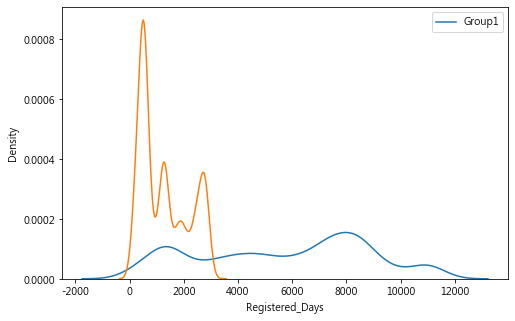

In [24]:
# Plot the Age_Sex features
plt.figure(figsize = (8,5))
plt.xlabel('Registered_Days')
plt.ylabel('Density')
for tag in np.sort(Wealth_pool['Label'].unique()):
    filter_ = Wealth_pool['Label'] == tag
    sns.kdeplot(Wealth_pool[filter_].Registered_Days)
    plt.legend(labels = ['Group{}'.format(tag)])

In [24]:
Wealth_pool_B = pd.crosstab(Wealth_pool.Label,Wealth_pool.Bonus_release)
Wealth_pool_B['00'] = Wealth_pool_B[0]/10
Wealth_pool_B['11'] = Wealth_pool_B[1]/2
Wealth_pool_B

Bonus_release,0,1,00,11
Label,,,,
0,4351,863,435.1,431.5
1,4999,215,499.9,107.5


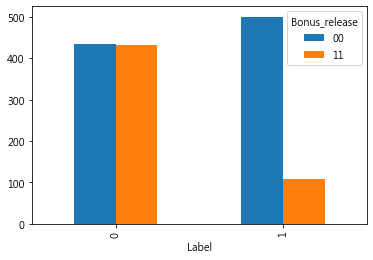

In [25]:
Wealth_pool_B.iloc[:,2:].plot.bar()

In [26]:
Oversea_pool_B = pd.crosstab(Oversea_pool.Label,Oversea_pool.Bonus_release)
Oversea_pool_B['00'] = Oversea_pool_B[0]/10
Oversea_pool_B['11'] = Oversea_pool_B[1]/2
Oversea_pool_B

Bonus_release,0,1,00,11
Label,,,,
0,705,134,70.5,67.0
1,785,54,78.5,27.0


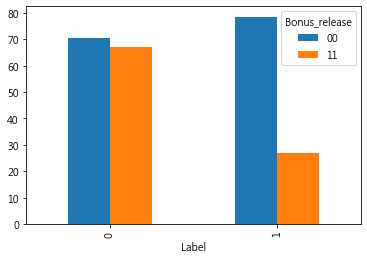

In [27]:
Oversea_pool_B.iloc[:,2:].plot.bar()

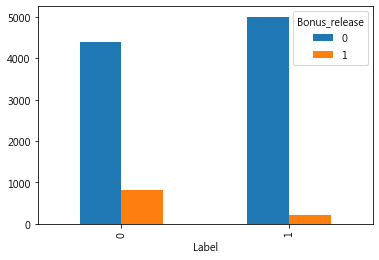

In [32]:
pd.crosstab(Wealth_pool.Label,Wealth_pool.Bonus_release).plot.bar()

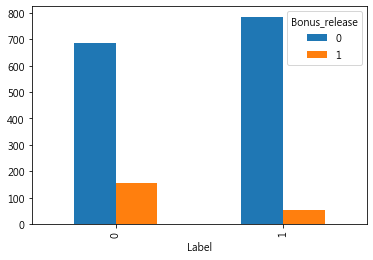

In [34]:
pd.crosstab(Oversea_pool.Label,Oversea_pool.Bonus_release).plot.bar()

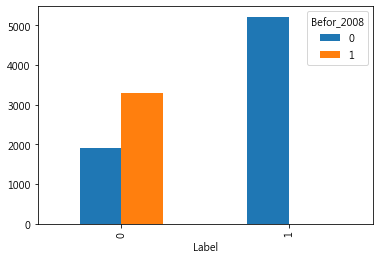

In [35]:
pd.crosstab(Wealth_pool.Label,Wealth_pool.Befor_2008).plot.bar()

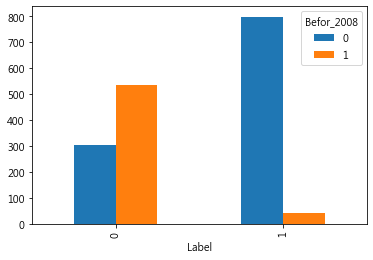

In [36]:
pd.crosstab(Oversea_pool.Label,Oversea_pool.Befor_2008).plot.bar()

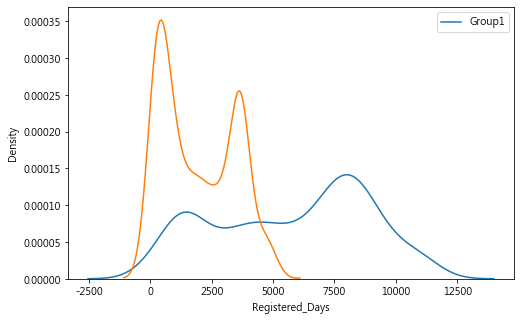

In [25]:
# Plot the Age_Sex features
plt.figure(figsize = (8,5))
plt.xlabel('Registered_Days')
plt.ylabel('Density')
for tag in np.sort(Oversea_pool['Label'].unique()):
    filter_ = Oversea_pool['Label'] == tag
    sns.kdeplot(Oversea_pool[filter_].Registered_Days)
    plt.legend(labels = ['Group{}'.format(tag)])

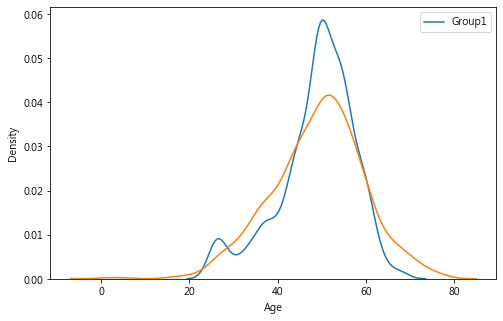

In [39]:
# Plot the Age_Sex features
plt.figure(figsize = (8,5))
plt.xlabel('Age')
plt.ylabel('Density')
for tag in np.sort(Oversea_pool['Label'].unique()):
    filter_ = Oversea_pool['Label'] == tag
    sns.kdeplot(Oversea_pool[filter_].Age)
    plt.legend(labels = ['Group{}'.format(tag)])

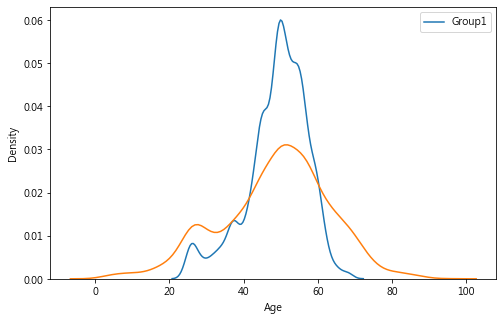

In [40]:
# Plot the Age_Sex features
plt.figure(figsize = (8,5))
plt.xlabel('Age')
plt.ylabel('Density')
for tag in np.sort(Wealth_pool['Label'].unique()):
    filter_ = Wealth_pool['Label'] == tag
    sns.kdeplot(Wealth_pool[filter_].Age)
    plt.legend(labels = ['Group{}'.format(tag)])

### Logistic Model (Wealth)

In [277]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Wealth_train_x = sc.fit_transform(Wealth_train_x)
Wealth_test_x = sc.transform(Wealth_test_x)

In [278]:
# Implement 
import statsmodels.api as sm
logit_model=sm.Logit(Wealth_train_y,Wealth_train_x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.343457
         Iterations 29
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.504    
Dependent Variable:   y                  AIC:                5802.2369
Date:                 2020-05-18 18:08   BIC:                6055.2829
No. Observations:     8342               Log-Likelihood:     -2865.1  
Df Model:             35                 LL-Null:            -5782.2  
Df Residuals:         8306               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       29.0000                                         
----------------------------------------------------------------------
     Coef.     Std.Err.      z     P>|z|      [0.025         0.975]   
----------------------------------------------------------------------
x1   0.1940        0.0350   5.5388 0.0000         0.1253        0.2626
x2

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [279]:
# Fitting Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(Wealth_train_x, Wealth_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [280]:
# Testing
y_pred = logreg.predict(Wealth_test_x)
print('Accuracy of logistic regression(Wealth) classifier on test set: {:.2f}'.\
      format(logreg.score(Wealth_test_x, Wealth_test_y)))

Accuracy of logistic regression(Wealth) classifier on test set: 0.85


### Logistic Model (Oversea)

In [281]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Oversea_train_x = sc.fit_transform(Oversea_train_x)
Oversea_test_x = sc.transform(Oversea_test_x)

In [282]:
# Implement 
import statsmodels.api as sm
logit_model=sm.Logit(Oversea_train_y,Oversea_train_x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.407022
         Iterations 30
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.413      
Dependent Variable:   y                AIC:              1164.4473  
Date:                 2020-05-18 18:08 BIC:              1351.7162  
No. Observations:     1342             Log-Likelihood:   -546.22    
Df Model:             35               LL-Null:          -930.13    
Df Residuals:         1306             LLR p-value:      9.9419e-139
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       30.0000                                       
--------------------------------------------------------------------
     Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------
x1   0.3746       0.0857  4.3696 0.0000         0.2066        0.5426
x2   0.3525       0.0811  4

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [283]:
# Fitting Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(Oversea_train_x, Oversea_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
# Testing
y_pred = logreg.predict(Wealth_test_x)
print('Accuracy of logistic regression(Oversea) classifier on test set: {:.2f}'.\
      format(logreg.score(Oversea_test_x, Oversea_test_y)))

Accuracy of logistic regression(Oversea) classifier on test set: 0.81
